In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable
pd.options.mode.chained_assignment = None
plot_root = '../../plots/plots_paper/'
data_root = '../../'
pd.set_option('mode.chained_assignment',None)

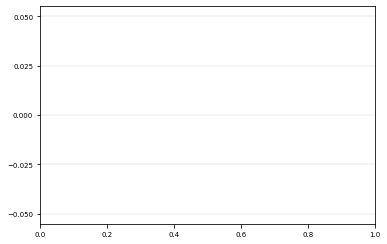

In [ ]:
mpl.__version__
mpl.rcParams.update({'font.size': 7})
mpl.rcParams['axes.grid'] = True
mpl.rcParams.update({'axes.grid.axis':'y','grid.color':'#949494','grid.linewidth':0.2})
plt.locator_params(axis='y', nbins=5)   # y-axis

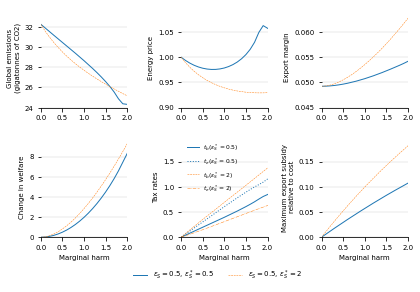

In [ ]:
################################################################################
###### Fig 1:# Outcomes of optimal tax in OECD (two elasticities) ##############
################################################################################
df = pd.read_csv(data_root + 'output/output_case3.csv');
dff = pd.read_csv(data_root + 'output/output_case3_D_2.csv');
df['eff_te']=df['te']-df['tb']
dff['eff_te']=dff['te']-dff['tb']

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,2)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    

df1=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)]
l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['eff_te'], linestyle='dotted', color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)

df1=dff[(dff['tax_sce']=='Unilateral') & (dff['region_scenario']==3)]
l2,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax2.plot(df1['varphi'],df1['pe'], color='C1',linewidth=0.5,linestyle='dashed')
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax4.plot(df1['varphi'],df1['welfare'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['tb'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['eff_te'], color='C1',linewidth=0.5,linestyle='dashdot')
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C1',linewidth=0.5,linestyle='dashed')

ax4.set_xlabel('Marginal harm')
ax5.set_xlabel('Marginal harm')
ax6.set_xlabel('Marginal harm')
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')

ax1.set_ylim(24, 34)
ax2.set_ylim(0.9, 1.1)
ax3.set_ylim(0.045, 0.065)
ax4.set_ylim(0, 10)
ax5.set_ylim(0, 2)
ax6.set_ylim(0, 0.2)

ax1.set_yticks([24,26,28,30,32])
ax2.set_yticks([0.9,0.95,1.0,1.05])
ax3.set_yticks([0.045, 0.050, 0.055, 0.060])
ax4.set_yticks([0,2,4,6,8])
ax5.set_yticks([0,0.5,1,1.5])
ax6.set_yticks([0,0.05,0.1,0.15])

ax5.legend( (r"$t_b (\epsilon_S^*=0.5)$", "$t_e (\epsilon_S^*=0.5)$", "$t_b (\epsilon_S^*=2)$", "$t_e (\epsilon_S^*=2)$"),fontsize=6, loc='upper left', 
            shadow=False, frameon=False)

ax4.legend(handles = [l1,l2] , labels=[r"$\epsilon_S=0.5$, $\epsilon_S^*=0.5$","$\epsilon_S=0.5$, $\epsilon_S^*=2$"],
            loc='upper left', bbox_to_anchor=(1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + 'fig1.eps', format='eps')
plt.savefig(plot_root+ 'fig1.pdf', format='PDF')

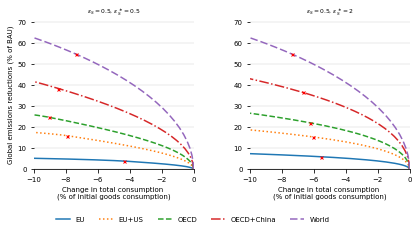

In [12]:
##############################################################################
# Fig 2: two PPFs with two elasticities (EU, EU/US, OECD, OECD/China, World) #
##############################################################################

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.set_position([.08, .32, .37, .52])
ax2.set_position([.58, .32, .37, .52])

x=0
for ax in fig.get_axes():
    ax.set_xlim(-10,0)
    ax.set_ylim(0,71)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
    
    x=x+1
    if x==1:
        df = pd.read_csv(data_root + 'output/output_case3.csv'); #elasticity (0.5,0.5)
    elif x==2:
        df = pd.read_csv(data_root + 'output/output_case3_D_2.csv'); #elasticity (0.5,2)

    ##EU
    df1=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==2)] 
    df1['Qeworld_chg']=-(df1['Qeworld_prime']-32.2760)/32.2760*100;
    l1, = ax.plot(df1['welfare_noexternality'],df1['Qeworld_chg'],linestyle='solid')
    dot=df1[df1['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
        
    
    ##EU/US
    df2=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==7)] 
    df2['Qeworld_chg']=-(df2['Qeworld_prime']-32.2760)/32.2760*100;
    l2, = ax.plot(df2['welfare_noexternality'],df2['Qeworld_chg'],linestyle='dotted')
    dot=df2[df2['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       
    
    ##OECD
    df3=df[(df['tax_sce']=='Unilateral')  & (df['region_scenario']==3)]
    df3['Qeworld_chg']=-(df3['Qeworld_prime']-32.2760)/32.2760*100;
    l3, = ax.plot(df3['welfare_noexternality'],df3['Qeworld_chg'],linestyle='dashed')
    dot=df3[df3['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       
    
    ##OECD/China
    df4=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==6)]
    df4['Qeworld_chg']=-(df4['Qeworld_prime']-32.2760)/32.2760*100;
    l4, = ax.plot(df4['welfare_noexternality'],df4['Qeworld_chg'],linestyle='dashdot')
    dot=df4[df4['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       
    
    ##World
    df5=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==4)] 
    df5['Qeworld_chg']=-(df5['Qeworld_prime']-32.2760)/32.2760*100;
    l5, = ax.plot(df5['welfare_noexternality'],df5['Qeworld_chg'],linestyle='dashed',dashes = (5,2))
    dot=df5[df5['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       

ax1.set_ylabel('Global emissions reductions (% of BAU)')
ax1.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^\ast=0.5$", fontsize=6)
ax2.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^\ast=2$", fontsize=6)

ax1.legend(handles = [l1,l2,l3,l4,l5] , labels=['EU', 'EU+US','OECD','OECD+China','World'],
            loc='upper left', bbox_to_anchor=(0.1, -0.27),fancybox=True, shadow=False, ncol=5,
            frameon=False)
# 

plt.savefig(plot_root + 'fig2.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.0)
plt.savefig(plot_root +'fig2.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

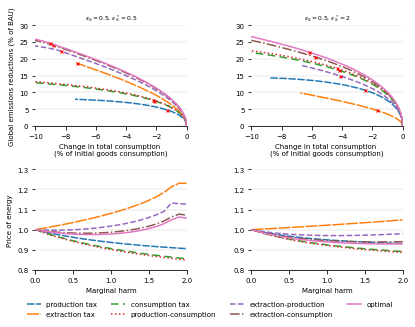

In [14]:
##############################################################################
######### Fig3: two PPFs with twasticities (7 taxes) #########################
##############################################################################

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
ax1.set_position([.1, .65, .35, .35])
ax2.set_position([.6, .65, .35, .35])
ax3.set_position([.1, .15, .35, .35])
ax4.set_position([.6, .15, .35, .35])

df1 = pd.read_csv(data_root + 'output/output_case3.csv')
df2 = pd.read_csv(data_root + 'output/output_case3_D_2.csv')

i = 0
for ax, df in zip([ax1,ax2],[df1,df2]):
    ax.set_xlim(-10,0)
    ax.set_ylim(0,30)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    x = 'welfare_noexternality'
    y = 'Qeworld_chg'
    ##puretp
    df_plot=df[(df['tax_sce']=='puretp') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/df_plot['Qeworld_prime'].iat[0] * 100
    l1, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##purete
    df_plot=df[(df['tax_sce']=='purete') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/ df_plot['Qeworld_prime'].iat[0] * 100
    l2, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'C1')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##puretc
    df_plot=df[(df['tax_sce']=='puretc') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l3, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'C2')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##production/consumption
    df_plot=df[(df['tax_sce']=='PC_hybrid') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l4, = ax.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption', color = 'C3')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##extracion/production
    df_plot=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3)] 
    if i == 1:
        df_plot=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3) & (df['varphi'] < 2.8)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l5, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'C4')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    # #extraction/consumption
    df_plot=df[(df['tax_sce']=='EC_hybrid') & (df['region_scenario']==3)]
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l6, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption', color = 'C5')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##unilateral optimal
    df_plot=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l7, = ax.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'C6')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 
    
    i+=1 
    
for ax, df in zip([ax3,ax4],[df1,df2]):
    ax.set_xlim(0,2)
    ax.set_ylim(0.8,1.3)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    x = 'varphi'
    y = 'pe'
    df = df[df['varphi']<=2]
    ##puretp
    df_plot=df[(df['tax_sce']=='puretp') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/df_plot['Qeworld_prime'].iat[0] * 100
    l1, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

    ##purete
    df_plot=df[(df['tax_sce']=='purete') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/ df_plot['Qeworld_prime'].iat[0] * 100
    l2, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'C1')

    ##puretc
    df_plot=df[(df['tax_sce']=='puretc') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l3, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'C2')

    ##production/consumption
    df_plot=df[(df['tax_sce']=='PC_hybrid') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l4, = ax.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption', color = 'C3')

    ##extracion/production
    df_plot=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3)] 
    if i == 1:
        df_plot=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3) & (df['varphi'] < 2.8)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l5, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'C4')

    # #extraction/consumption
    df_plot=df[(df['tax_sce']=='EC_hybrid') & (df['region_scenario']==3)]
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l6, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption', color = 'C5')

    ##unilateral optimal
    df_plot=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l7, = ax.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'C6')
    
    i+=1 

################## Labels ##########################################
xlab = 'Change in total consumption \n(% of initial goods consumption)'
ylab = 'Global emissions reductions (% of BAU)'
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)
ax2.set_xlabel(xlab)
ax1.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^*=0.5$", fontsize=6)
ax2.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^*=2$", fontsize=6)

xlab1 = 'Marginal harm'
ylab1 = 'Price of energy'
ax3.set_xlabel(xlab1)
ax4.set_xlabel(xlab1)
ax3.set_ylabel(ylab1)

labs = ['production tax', 'extraction tax','consumption tax','production-consumption','extraction-production','extraction-consumption','optimal']
ax3.legend(handles = [l1,l2,l3,l4,l5,l6,l7] , labels= labs, 
           loc='upper left', bbox_to_anchor=(-0.1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + 'fig3.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root +'fig3.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

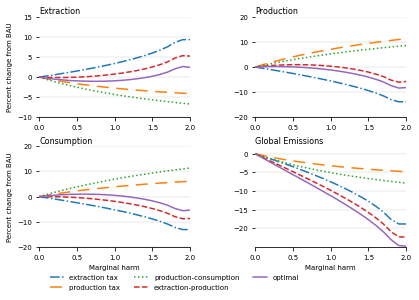

In [15]:
##############################################################################
############### Fig 5: location effects ######################################
##############################################################################
df = pd.read_csv(data_root + 'output/output_case3.csv')
df = pd.read_csv(data_root + 'output_sig0/ces0.csv')
Qestar=df['Qestar_prime'][1]    #BAU values
Qeworld=df['Qeworld_prime'][1]
Cestar=df['Ceystar_prime'][1]+df['Cex_prime'][1]
Gestar=df['Cem_prime'][1]+df['Ceystar_prime'][1]
df['chg_extraction']=df['chg_extraction']/Qestar*100  #change from absolute change to percent change
df['chg_production']=df['chg_production']/Gestar*100
df['chg_consumption']=df['chg_consumption']/Cestar*100
df['chg_Qeworld']=df['chg_Qeworld']/Qeworld*100

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
for ax in fig.get_axes():
    ax.set_xlim(0,2)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.locator_params(axis='y', nbins=5)   # y-axis
    ax.locator_params(axis='x', nbins=5)   # y-axis

ax3.set_xlabel('Marginal harm')
ax4.set_xlabel('Marginal harm')
ax1.set_ylabel('Percent change from BAU')
ax3.set_ylabel('Percent change from BAU')
ax1.set_position([.1, .6, .35, .35])
ax2.set_position([.6, .6, .35, .35])
ax3.set_position([.1, .15, .35, .35])
ax4.set_position([.6, .15, .35, .35])
 

#
df1=df[(df['tax_sce']=='purete') & (df['region_scenario']==3)]
l1, = ax1.plot(df1['varphi'],df1['chg_extraction'],linestyle='dashdot')
ax2.plot(df1['varphi'],df1['chg_production'],linestyle='dashdot')
ax3.plot(df1['varphi'],df1['chg_consumption'],linestyle='dashdot')
ax4.plot(df1['varphi'],df1['chg_Qeworld'],linestyle='dashdot')

#
df2=df[(df['tax_sce']=='puretp') & (df['region_scenario']==3)]
l2, = ax1.plot(df2['varphi'],df2['chg_extraction'],linestyle='dashed',dashes = (8,5))
ax2.plot(df2['varphi'],df2['chg_production'],linestyle='dashed',dashes = (8,5))
ax3.plot(df2['varphi'],df2['chg_consumption'],linestyle='dashed',dashes = (8,5))
ax4.plot(df2['varphi'],df2['chg_Qeworld'],linestyle='dashed',dashes = (8,5))


#
df3=df[(df['tax_sce']=='PC_hybrid') & (df['region_scenario']==3)]
l3, = ax1.plot(df3['varphi'],df3['chg_extraction'],linestyle='dotted')
ax2.plot(df3['varphi'],df3['chg_production'],linestyle='dotted')
ax3.plot(df3['varphi'],df3['chg_consumption'],linestyle='dotted')
ax4.plot(df3['varphi'],df3['chg_Qeworld'],linestyle='dotted')

#
df4=df[(df['tax_sce']=='EP_hybrid') & (df['region_scenario']==3)]
l4, = ax1.plot(df4['varphi'],df4['chg_extraction'],linestyle='dashed')
ax2.plot(df4['varphi'],df4['chg_production'],linestyle='dashed')
ax3.plot(df4['varphi'],df4['chg_consumption'],linestyle='dashed')
ax4.plot(df4['varphi'],df4['chg_Qeworld'],linestyle='dashed')

#
df5=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)]
l5, = ax1.plot(df5['varphi'],df5['chg_extraction'],linestyle='solid')
ax2.plot(df5['varphi'],df5['chg_production'],linestyle='solid')
ax3.plot(df5['varphi'],df5['chg_consumption'],linestyle='solid')
ax4.plot(df5['varphi'],df5['chg_Qeworld'],linestyle='solid')

ax1.set_title('Extraction',loc='left',fontsize = 8, pad=3)
ax1.set_ylim(-10,15)
ax1.set_yticks([-10,-5, 0, 5,10, 15])
ax2.set_title('Production',loc='left',fontsize = 8, pad=3)
ax2.set_ylim(-20,20)
ax2.set_yticks([-20,-10 , 0, 10, 20])
ax3.set_title('Consumption',loc='left',fontsize = 8, pad=3)
ax3.set_ylim(-20,20)
ax2.set_yticks([-20,-10 , 0, 10, 20])
ax4.set_title('Global Emissions',loc='left',fontsize = 8, pad=3)
ax4.set_ylim(-25, 2)
ax4.set_yticks([-20., -15, -10, -5, 0])

ax4.legend(handles = [l1,l2,l3,l4,l5] , 
            labels=['extraction tax', 'production tax','production-consumption', 
                    'extraction-production','optimal'],
            loc='upper left', bbox_to_anchor=(-1.4, -0.21),
            fancybox=True, shadow=False, ncol=3, frameon=False)

plt.savefig(plot_root + 'leakage.pdf', format='pdf')
plt.savefig(plot_root + 'leakage.eps', format='eps')

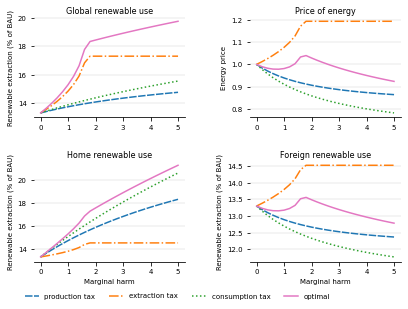

In [18]:
##############################################################################
############### Fig 6: Renewable effects #####################################
##############################################################################
df1= pd.read_csv(data_root + 'output_renewable/all_867_867.csv')
df2 = pd.read_csv(data_root + 'output_sig0/ces0.csv')
df1 = df1[df1['region_scenario'] == 3]
df1['Qe1world_prime'] = df1['Qe1_prime'] + df1['Qe1star_prime']
df1 = df1[df1['varphi'] <= 5]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_position([.1, .65, .35, .35])
ax2.set_position([.6, .65, .35, .35])
ax3.set_position([.1, .15, .35, .35])
ax4.set_position([.6, .15, .35, .35])

for ax in fig.get_axes():
    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)

##################World Renewable Use###########################
df1['Qe2world'] = df1['Qe2_prime'] + df1['Qe2star_prime']
df1['prop_qe2'] = df1['Qe2world'] / df1['Qeworld_prime'] * 100
x = 'varphi'
y = 'prop_qe2'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax1.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax1.plot(df_plot[x], df_plot[y], linestyle='dashdot', label = 'extraction tax',color = 'C1') 

df_plot = df1[df1['tax_sce'] == 'puretc']
ax1.plot(df_plot[x], df_plot[y], linestyle='dotted', label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax1.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

################## Home Renewable Use ###########################
x = 'varphi'
y = 'pe'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax2.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax2.plot(df_plot[x], df_plot[y], linestyle='dashdot', label = 'extraction tax',color = 'C1') 

df_plot = df1[df1['tax_sce'] == 'puretc']
ax2.plot(df_plot[x], df_plot[y], linestyle='dotted', label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax2.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

################## Home Renewable Use ###########################
df1['prop_energy'] = df1['Qe2_prime'] / df1['Qe_prime'].iat[0] * 100
x = 'varphi'
y = 'prop_energy'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax3.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax3.plot(df_plot[x], df_plot[y], linestyle='dashdot', label = 'extraction tax',color = 'C1') 

df_plot = df1[df1['tax_sce'] == 'puretc']
ax3.plot(df_plot[x], df_plot[y], linestyle='dotted', label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax3.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

################## Foreign Renewable Use ###########################
df1['prop_energy_star'] = df1['Qe2star_prime'] / df1['Qestar_prime'].iat[0] * 100
x = 'varphi'
y = 'prop_energy_star'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax4.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax4.plot(df_plot[x], df_plot[y], linestyle='dashdot', label = 'extraction tax',color = 'C1')

df_plot = df1[df1['tax_sce'] == 'puretc']
ax4.plot(df_plot[x], df_plot[y], linestyle='dotted', label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax4.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

##################### Graph settings ##########################

ylab1 = 'Renewable extraction (% of BAU)'
ax1.set_ylabel(ylab1)
ax1.set_title('Global renewable use',fontsize = 8, pad=3)

ylab2 = 'Energy price'
xlab2 = 'Marginal harm'
#ax2.set_xlabel(xlab2)
ax2.set_ylabel(ylab2)
ax2.set_title('Price of energy', fontsize = 8, pad = 3)

ylab3 = 'Renewable extraction (% of BAU)'
xlab3 = 'Marginal harm'
ax3.set_xlabel(xlab3)
ax3.set_ylabel(ylab3)
ax3.set_title('Home renewable use', fontsize = 8, pad = 3)

ylab4 = 'Renewable extraction (% of BAU)'
xlab4 = 'Marginal harm'
ax4.set_xlabel(xlab4)
ax4.set_ylabel(ylab4)
ax4.set_title('Foreign renewable use', fontsize = 8, pad = 3)

labs = ['production tax', 'extraction tax','consumption tax','production-consumption','extraction-production','extraction-consumption','optimal']
ax3.legend(loc='upper left', bbox_to_anchor=(-0.1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

#plt.suptitle("Effects of Renewables")
plt.savefig(plot_root + 'renewable_commonscale.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + 'renewable_commonscale.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

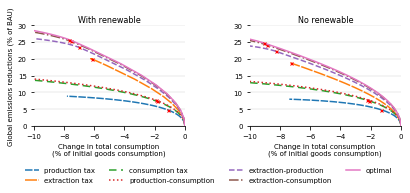

In [20]:
##############################################################################
############### Fig 7: Renewable comparisons #################################
##############################################################################
df1= pd.read_csv(data_root + 'output_renewable/all_867_867.csv')
df2 = pd.read_csv(data_root + 'output_sig0/ces0.csv')
df2 = pd.read_csv(data_root + 'output/output_case3.csv')
df1['Qe1world_prime'] = df1['Qe1_prime'] + df1['Qe1star_prime']

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_position([.1, .65, .35, .35])
ax2.set_position([.6, .65, .35, .35])

i = 0
for ax,df in zip(fig.get_axes(), [df1,df2]):
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.set_xlim(-10,0)
    ax.set_ylim(0,30)

    x = 'welfare_noexternality'
    y = 'Qeworld_chg'
    if i == 0:
        df['Qeworld_chg'] = -(df['Qe1world_prime']-df['Qe1world_prime'].iat[0])/df['Qe1world_prime'].iat[0] * 100
    else:
        df['Qeworld_chg'] = -(df['Qeworld_prime']-df['Qeworld_prime'].iat[0])/df['Qeworld_prime'].iat[0] * 100
    ##puretp
    df_plot=df[(df['tax_sce']=='puretp') & (df['region_scenario']==3)] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/df_plot['Qe1world_prime'].iat[0] * 100
    l1, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##purete
    df_plot=df[(df['tax_sce']=='purete') & (df['region_scenario']==3)] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/ df_plot['Qe1world_prime'].iat[0] * 100
    l2, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'C1')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##puretc
    df_plot=df[(df['tax_sce']=='puretc') & (df['region_scenario']==3)] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l3, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'C2')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##production/consumption
    df_plot=df[(df['tax_sce']=='PC_hybrid') & (df['region_scenario']==3)] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l4, = ax.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption', color = 'C3')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##extracion/production
    df_plot=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3)] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l5, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'C4')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    # #extraction/consumption
    df_plot=df[(df['tax_sce']=='EC_hybrid') & (df['region_scenario']==3)]
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l6, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption', color = 'C5')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##unilateral optimal
    df_plot=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l7, = ax.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'C6')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 
    i+= 1


ylab1 = 'Global emissions reductions (% of BAU)'
xlab1 = 'Change in total consumption \n(% of initial goods consumption)'
ax1.set_ylabel(ylab1)
ax1.set_xlabel(xlab1)
ax1.set_title('With renewable',fontsize = 8, pad=3)

xlab2 = 'Change in total consumption \n(% of initial goods consumption)'
ax2.set_xlabel(xlab2)
ax2.set_title('No renewable', fontsize = 8, pad = 3)

ax1.legend(loc='upper left', bbox_to_anchor=(-0.1, -0.35),fancybox=True, shadow=False, ncol=4, frameon=False)
plt.savefig(plot_root + 'renewable_comparison.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + 'renewable_comparison.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)